# Preparation des nos variables de sortie

Dans cette partie nous allons preparer notre ensemble de sortie en construisant nos varibles de sortie , celle ci seront 
constiruer à l'aide  des divers fonction qui nous aiderons à determiner pour une année si sur base des résultat que nous aons si un étudiant est passé en premiere seion, s'il a distingué ou bien s'il a échoue, nous determinerons enfin  le pourcentage obtebnu.

Notons que nous nous sommes butés à 2 grands problème concernant les données obtenus et qui risquent de biaiser nos calculs:
    - Nous n'avons pas pu obtenir le pourcentage final de certains étudiant ayant echouer ou abandonner leurs études avant la fin de l'année académique ces étudiants qui après la seconde session sont AA (Assimilé aux Ajournées ) n'ont pas de pourcentage final pour palier àce probleme nous avons remplacer cette valeur manquante par une valeur aleatoiree choisie entre 40 et 50 pourcent ce qui represente l'echec!
    - Pour nous étudiant le nombre des années académiques pour lequel nous avons le résultat n'est pas le meme  pour certains étudiant nous avons des informations pour 1 annéé académique, d'autres pour 2 , etc. Pour palier à ce problème nous avons utliser des ration pour nous valeur de sortie qui consiter à diviser le nombre sur le no,bre des année académique que l'étudiant a passée à la faculté


Comencons par charger nos libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for beatiful visualizations
%matplotlib inline 
import scipy.stats as scs #for statistics
import operator
from scipy.stats import chi2_contingency
import matplotlib.ticker as ticker

Notons que dans cette partie nous allons Aussi faire une analyse statistique univarié et bi-varié entre nos données d"entree et celle de sortie

In [2]:
dataset=pd.read_csv("DatasetOut.csv",index_col="Unnamed: 0")

In [3]:
dataset.rename(columns={'IDENTIFICATION':'ID'},inplace=True)

In [4]:
SuccefullMent=['S']
PartialSuccess=['ADM', 'ADTFC', 'ADSTM', 'ADSTFC', 'ADST']
Distinction=['D','GD']
FailSession=['AA','AR','nan']
FailureMention=['A','NAF','ANAF']

In [5]:
dataset.MENT1.value_counts()

AA        4569
A         2351
S         2037
D          268
ADM        101
ADTFC       81
ADSTM       74
ADSTFC      55
ADST        45
NAF         17
GD           7
ANAF         1
Name: MENT1, dtype: int64

In [6]:
dataset.columns

Index([u'ID', u'ACADYEAR', u'PERC1', u'MENT1', u'PERC2', u'MENT2', u'FAC',
       u'OPT', u'PROM'],
      dtype='object')

Premierement Voici la fonction que nous avons utiliser pour determiner si un étudiant a reussi ou a echouer pour une année academique

In [8]:
def calculateSucess(x):
    """this function will check if a student pass of fail in an aacademic year"""
    if str(x['MENT2']) in FailSession+FailureMention and (str(x['MENT1']) not in SuccefullMent+PartialSuccess+Distinction):
        return pd.Series(True)
    else :
        return pd.Series(False)

In [10]:
Echec=dataset.apply(calculateSucess,axis=1)

In [12]:
Echec[:6]

,0
0,True
1,False
2,True
3,False
4,False
5,True


In [22]:
dataset[:6]

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,OPT,PROM,Echec
0,45,2013-2014,NaN,AA,NaN,NaN,FPSE,Sciences de l'Éducation,L2,True
1,215,2012-2013,NaN,ADM,63.099998,S,FD,Droit Privé et Judiciaire,L2,False
2,343,2015-2016,NaN,AA,52.200001,A,FSEG,Tronc commun,G2,True
3,356,2015-2016,NaN,ADSTM,59.900002,S,FSEG,Gestion des Entreprises,L2,False
4,398,2012-2013,65.099998,S,NaN,NaN,FSDC,Santé et Développement Communautaires,L2,False
5,429,2013-2014,NaN,AA,NaN,A,FD,Tronc commun,G1,True


Avec cette unction nous avons pu determier si un étudiant a reussi ou echoué dans une année académique

In [21]:
dataset['Echec']=Echec

Ensuite On cherche à déterminer si l'étudiant est passé en premiere session dans une anné academique 

Voici la fonction qui nous permet d'effectuer ses calculs:

In [27]:
def calculatePass1estSes(x):
    """this function will check if a student pass in the 1st session in an academic year"""
    if x['MENT1'] in SuccefullMent+Distinction:
        return pd.Series(True)
    else :
        return pd.Series(False)

In [28]:
Pass1erSession=dataset.apply(calculatePass1estSes,axis=1)

In [29]:
dataset.loc[:,'Pass1erSession']=Pass1erSession
dataset['Pass1erSession']=Pass1erSession

In [30]:
dataset.head(8)

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,OPT,PROM,Echec,Pass1erSession
0,45,2013-2014,NaN,AA,NaN,NaN,FPSE,Sciences de l'Éducation,L2,True,False
1,215,2012-2013,NaN,ADM,63.099998,S,FD,Droit Privé et Judiciaire,L2,False,False
2,343,2015-2016,NaN,AA,52.200001,A,FSEG,Tronc commun,G2,True,False
3,356,2015-2016,NaN,ADSTM,59.900002,S,FSEG,Gestion des Entreprises,L2,False,False
4,398,2012-2013,65.099998,S,NaN,NaN,FSDC,Santé et Développement Communautaires,L2,False,True
5,429,2013-2014,NaN,AA,NaN,A,FD,Tronc commun,G1,True,False
6,474,2014-2015,NaN,AA,NaN,NaN,FD,Droit Privé et Judiciaire,G3,True,False
7,474,2015-2016,62.500000,S,NaN,NaN,FD,Droit Privé et Judiciaire,G3,False,True


Ensuite on cherche à determiner si un étudiant a distinguer au cours d'une académique , voicila function:

In [34]:
def calculateDistinCtion(x):
    """this function will check if a student get a distinction mention in aacademic year"""
    if x['MENT1'] in Distinction or x['MENT2']in Distinction:
        return pd.Series(True)
    else :
        return pd.Series(False)

In [35]:
Distinction=dataset.apply(calculateDistinCtion,axis=1)

In [36]:
dataset.loc[:,'Distinction']=Distinction
dataset['Distinction']=Distinction

In [39]:
dataset.loc[dataset.Distinction].head(8)

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction
47,2221,2012-2013,70.199997,D,NaN,NaN,FD,L2,False,True,True
57,2457,2012-2013,76.400002,D,NaN,NaN,FSTA,TECH2,False,True,True
96,3298,2015-2016,70.699997,D,NaN,NaN,FPSE,L2,False,True,True
106,3578,2012-2013,70.099998,D,NaN,NaN,FD,L2,False,True,True
110,3588,2013-2014,NaN,AA,73.500000,D,FSTA,Tech1,False,False,True
114,3591,2013-2014,NaN,ADSTM,73.900002,D,FSTA,Tech2,False,False,True
123,3626,2014-2015,71.900002,D,NaN,NaN,FSTA,Tech1,False,True,True
140,3646,2013-2014,NaN,AA,73.300003,D,FSTA,Tech1,False,False,True


Enfin Calculons le pourcentage final qu'a obtenu un étudiant au cours d'une anné academique 

In [155]:
def calculatePourcenatge(x):
    """this function will check if a student pass of fail in an aacademic year"""
    if x['Pass1erSession'] :
        return pd.Series(x['PERC1'])
    elif x['MENT2'] in SuccefullMent and  x['MENT1'] in FailSession+FailureMention+PartialSuccess:
        return pd.Series(x['PERC2'])
    elif str(x['MENT2']) in Distinction and  str(x['MENT1']) in FailSession+FailureMention+PartialSuccess :
        return pd.Series(x['PERC2'])
    else:
        return pd.Series(x['PERC2'])

In [116]:
def calculateDistinCtion2emeS(x):
    if str(x['MENT2']) in Distinction :
        return pd.Series(x['MENT2'])

In [156]:
PercFinal=dataset.apply(calculatePourcenatge,axis=1)

In [157]:
PercFinal.loc[dataset.Pass1erSession]

,0
4,65.099998
7,62.500000
8,65.000000
9,60.400002
10,68.000000
17,62.900002
18,68.800003
23,62.400002
28,66.500000
34,65.099998


In [168]:
dataset.loc[:,'PercFinal']=PercFinal
dataset['PercFinal']=PercFinal

il ya des étudiant qui on reussi mais qui n'ont  pas de pourcentage final

In [169]:
dataset.loc[operator.and_(np.isnan(PercFinal.get(0)) ,operator.or_(dataset.MENT2=='S',dataset.MENT1=='S'))]

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction,PercFinal
248,3978,2013-2014,NaN,AA,NaN,S,FSDC,L2,False,False,False,NaN
2176,7150,2012-2013,50.400002,A,NaN,S,FSEG,G2,False,False,False,NaN
2700,7530,2012-2013,NaN,S,NaN,NaN,FSTA,G1,False,True,False,NaN
2739,7569,2012-2013,NaN,S,NaN,NaN,FSTA,G1,False,True,False,NaN
2837,7630,2012-2013,NaN,S,NaN,NaN,FSTA,G1,False,True,False,NaN
3022,7750,2013-2014,NaN,ADSTFC,NaN,S,FD,G3,False,False,False,NaN
3100,7804,2013-2014,NaN,AA,NaN,S,FD,G3,False,False,False,NaN
3701,8300,2012-2013,NaN,S,NaN,NaN,FSTA,G0,False,True,False,NaN
4089,8477,2012-2013,NaN,S,NaN,NaN,FSTA,G0,False,True,False,NaN
6648,9688,2012-2013,NaN,S,NaN,NaN,FSTA,G0,False,True,False,NaN


In [170]:
dataset.loc[operator.and_(np.isnan(PercFinal.get(0)) ,operator.or_(dataset.MENT2=='S',dataset.MENT1=='S')),'PercFinal']=55

In [192]:
dataset.loc[dataset.MENT2.isin(PartialSuccess),'PercFinal']=55

In [153]:
dataset.head(8)

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction,PercFinal
0,45,2013-2014,NaN,AA,NaN,NaN,FPSE,L2,True,False,False,NaN
1,215,2012-2013,NaN,ADM,63.099998,S,FD,L2,False,False,False,63.099998
2,343,2015-2016,NaN,AA,52.200001,A,FSEG,G2,True,False,False,52.200001
3,356,2015-2016,NaN,ADSTM,59.900002,S,FSEG,L2,False,False,False,59.900002
4,398,2012-2013,65.099998,S,NaN,NaN,FSDC,L2,False,True,False,NaN
5,429,2013-2014,NaN,AA,NaN,A,FD,G1,True,False,False,NaN
6,474,2014-2015,NaN,AA,NaN,NaN,FD,G3,True,False,False,NaN
7,474,2015-2016,62.500000,S,NaN,NaN,FD,G3,False,True,False,NaN


Nous allons remplacer les valeurs manquantes des pourcentage final par un nombre aleatoire symbolisant l'echec

In [122]:
dataset.loc[dataset.Distinction][['PERC1','PERC2','PercFinal','MENT1','MENT2']].MENT1.value_counts()

D         268
AA         74
ADSTM       7
GD          7
A           5
ADM         4
ADTFC       4
ADSTFC      2
ADST        1
Name: MENT1, dtype: int64

In [ ]:
Verifions encore

In [172]:
dataset.loc[np.isnan(dataset.PercFinal)]['MENT2'].value_counts()

AA        515
A         485
NAF        46
ADM        23
ADSTM      19
ADTFC       5
ADST        5
ANAF        3
AR          2
ADSTFC      2
Name: MENT2, dtype: int64

In [173]:
dataset.PercFinal=dataset.PercFinal.apply(lambda x: np.random.choice([x for x in range(40,50)]) if (np.isnan(x)) else x)

In [174]:
dataset.head(8)

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction,PercFinal
0,45,2013-2014,NaN,AA,NaN,NaN,FPSE,L2,True,False,False,43.000000
1,215,2012-2013,NaN,ADM,63.099998,S,FD,L2,False,False,False,63.099998
2,343,2015-2016,NaN,AA,52.200001,A,FSEG,G2,True,False,False,52.200001
3,356,2015-2016,NaN,ADSTM,59.900002,S,FSEG,L2,False,False,False,59.900002
4,398,2012-2013,65.099998,S,NaN,NaN,FSDC,L2,False,True,False,65.099998
5,429,2013-2014,NaN,AA,NaN,A,FD,G1,True,False,False,41.000000
6,474,2014-2015,NaN,AA,NaN,NaN,FD,G3,True,False,False,46.000000
7,474,2015-2016,62.500000,S,NaN,NaN,FD,G3,False,True,False,62.500000


Nous venons de finir le calcul de nos metriques  d'evaluations groupons enfin les metriques pour l'étudiant m

In [175]:
 def f(x):
    A=list(x['Echec'])
    D=list(x['Distinction'])
    S1=list(x['Pass1erSession'])
    Nbre=float(len(x['ACADYEAR']))
    return pd.Series(dict(
     EchecRatio=int(A.count(True))/Nbre,
     DistinctionRatio=int(D.count(True))/Nbre,
     Pass1stSessionRatio=int(S1.count(True))/Nbre,
     CGPA=np.mean(x['PercFinal']),
     NACADYEAR=int(Nbre)
    ))

In [230]:
datasetRatio=dataset.groupby('ID').apply(f).reset_index()

In [231]:
datasetRatio.head(8)

,ID,CGPA,DistinctionRatio,EchecRatio,NACADYEAR,Pass1stSessionRatio
0,45,43.000000,0.0,1.0,1.0,0.0
1,215,63.099998,0.0,0.0,1.0,0.0
2,343,52.200001,0.0,1.0,1.0,0.0
3,356,59.900002,0.0,0.0,1.0,0.0
4,398,65.099998,0.0,0.0,1.0,1.0
5,429,41.000000,0.0,1.0,1.0,0.0
6,474,54.250000,0.0,0.5,2.0,0.5
7,526,65.000000,0.0,0.0,1.0,1.0


In [212]:
datasetRatio.loc[operator.and_(datasetRatio.DistinctionRatio == 1 , datasetRatio.NACADYEAR==3)]

,ID,CGPA,DistinctionRatio,EchecRatio,NACADYEAR,Pass1stSessionRatio
211,4091,72.199999,1.0,0.0,3.0,0.000000
671,5178,71.533333,1.0,0.0,3.0,0.666667
1095,6914,74.900002,1.0,0.0,3.0,1.000000
1928,8498,72.433334,1.0,0.0,3.0,1.000000
2364,9048,71.733332,1.0,0.0,3.0,0.333333
2393,9078,80.766665,1.0,0.0,3.0,1.000000
2830,9527,75.866666,1.0,0.0,3.0,1.000000


In [213]:
dataset.loc[dataset.ID==9078]

,ID,ACADYEAR,PERC1,MENT1,PERC2,MENT2,FAC,PROM,Echec,Pass1erSession,Distinction,PercFinal
5311,9078,2013-2014,80.199997,GD,NaN,NaN,FSTA,G0,False,True,True,80.199997
5312,9078,2014-2015,82.699997,GD,NaN,NaN,FSTA,G1,False,True,True,82.699997
5313,9078,2015-2016,79.400002,D,NaN,NaN,FSTA,G2,False,True,True,79.400002


Le modèle est parfait Nous pouvons maintenant passer à l'analyse des données de sortie Pour nous 2 ensembles d'apprentissage

In [233]:
dataset.to_csv('DatasetOutV2.csv')
datasetRatio.to_csv('DatasetOutRatioV1.csv')

In [247]:
datasetRatio=pd.read_csv('DatasetOutRatioV1.csv',index_col='Unnamed: 0')

In [237]:
datasetRatio.head(1)

,ID,CGPA,DistinctionRatio,EchecRatio,NACADYEAR,Pass1stSessionRatio
0,45,43.0,0.0,1.0,1.0,0.0


## Analyse des données en entré Vs Donnnées en Sortie 

Nous allons effectuer maintenat une analyse bi varié des données en entrée VS les donnes en sortie et expliquer nos données de sortie

Nous venons d'avoir notre ensemble d'apprentissage de sortie et disons que notre sortie comprend que notre ensemble comprend non pas un seul variable de sortie mais 4 variable de sortie qui sont :

- Le CGPA : La moyenne des points obtenus au cours d'une années académique
- DistinctionRatio : Le nombre de fois que l'etudiant a distinctigué divisé par le nombre des années academique
- EchecRatio : Le nombre de fois que l'etudiant a échoué divisé par le nombre des années academique
- PassAstSessionRatio : Le nombre de fois que l'etudiant est passée en prèmiere session divisé par le nombre des années academique


Nos 3 dernier ration sont des nombres variant qui peuvent prendre ses differents valeurs :
    - 0 :signifie que l'etudiant a un ration de 0
    - 1 :signifie ration: 1/1,2/2,3/3,4/4
    -0.25 : 1/4
    -0.3333: 1/3
    -0.5:2/4 ou 1/2
    -0.66666 :2/3
    -0.75:3/4
Nous allons apprenhender ce probleme en terme de classification donc nous allons affecter des lettre à ces ration:
    - 0: G
    - 1:A
    - 0.25 : F
    - 0.333:E
    - 0.5:D
    - 0.666:C
    - 0.75:B
qui correspond au classe respectif!

    

In [215]:
datasetRatio.columns

Index([u'ID', u'CGPA', u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [257]:
datasetRatio.loc[datasetRatio.EchecRatio==0.0,'EchecRatio']='G'
datasetRatio.loc[datasetRatio.EchecRatio==1.0,'EchecRatio']='A'
datasetRatio.loc[datasetRatio.EchecRatio==1.0/4.0,'EchecRatio']='F'
datasetRatio.loc[datasetRatio.EchecRatio==0.333333333333,'EchecRatio']='E'
datasetRatio.loc[datasetRatio.EchecRatio==2.0/4.0,'EchecRatio']='D'
datasetRatio.loc[datasetRatio.EchecRatio==0.666666666667,'EchecRatio']='C'
datasetRatio.loc[datasetRatio.EchecRatio==3.0/4,'EchecRatio']='B'

In [258]:
datasetRatio.loc[datasetRatio.DistinctionRatio==0.0,'DistinctionRatio']='G'
datasetRatio.loc[datasetRatio.DistinctionRatio==1.0,'DistinctionRatio']='A'
datasetRatio.loc[datasetRatio.DistinctionRatio==1.0/4.0,'DistinctionRatio']='F'
datasetRatio.loc[datasetRatio.DistinctionRatio==0.333333333333,'DistinctionRatio']='E'
datasetRatio.loc[datasetRatio.DistinctionRatio==2.0/4.0,'DistinctionRatio']='D'
datasetRatio.loc[datasetRatio.DistinctionRatio==0.666666666667,'DistinctionRatio']='C'
datasetRatio.loc[datasetRatio.DistinctionRatio==3.0/4,'DistinctionRatio']='B'

In [264]:
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==0.0,'Pass1stSessionRatio']='G'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==1.0,'Pass1stSessionRatio']='A'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==1.0/4.0,'Pass1stSessionRatio']='F'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==0.333333333333,'Pass1stSessionRatio']='E'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==2.0/4.0,'Pass1stSessionRatio']='D'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==0.666666666667,'Pass1stSessionRatio']='C'
datasetRatio.loc[datasetRatio.Pass1stSessionRatio==3.0/4,'Pass1stSessionRatio']='B'

In [263]:
datasetRatio.head(8)

,ID,CGPA,DistinctionRatio,EchecRatio,NACADYEAR,Pass1stSessionRatio
0,45,43.000000,G,A,1.0,G
1,215,63.099998,G,G,1.0,G
2,343,52.200001,G,A,1.0,G
3,356,59.900002,G,G,1.0,G
4,398,65.099998,G,G,1.0,A
5,429,41.000000,G,A,1.0,G
6,474,54.250000,G,D,2.0,D
7,526,65.000000,G,G,1.0,A


In [ ]:
datasetRatio.loc[datasetRatio.EchecRatio==0.0,'EchecRatio']='G'
datasetRatio.loc[datasetRatio.EchecRatio==1.0,'EchecRatio']='A'
datasetRatio.loc[datasetRatio.EchecRatio==1.0/4.0,'EchecRatio']='F'
datasetRatio.loc[datasetRatio.EchecRatio==1.0/3.0,'EchecRatio']='E'
datasetRatio.loc[datasetRatio.EchecRatio==2.0/4.0,'EchecRatio']='D'
datasetRatio.loc[datasetRatio.EchecRatio==2.0/3.0,'EchecRatio']='C'
datasetRatio.loc[datasetRatio.EchecRatio==3.0/4,'EchecRatio']='B'

Combinons maitenant notre ensemble d'entre  avec notre ensemble de sortie

In [284]:
datasetRatio.groupby('DistinctionRatio')['CGPA'].mean()

DistinctionRatio
A    73.105980
B    71.425000
C    69.649275
D    68.470455
E    66.661364
F    65.686905
G    56.424207
Name: CGPA, dtype: float64

In [283]:
datasetRatio.loc[datasetRatio.DistinctionRatio<=0.333333333333,'DistinctionRatio']='E'


In [285]:
datasetRatio.loc[datasetRatio.Pass1stSessionRatio<=0.333333333333,'Pass1stSessionRatio']='E'

In [289]:
datasetRatio.loc[datasetRatio.EchecRatio<=0.333333333333,'EchecRatio']='E'

In [287]:
datasetRatio.groupby('Pass1stSessionRatio')['CGPA'].mean()

Pass1stSessionRatio
A    64.332685
B    64.482927
C    62.619497
D    62.164337
E    60.775089
F    60.152778
G    54.513650
Name: CGPA, dtype: float64

In [290]:
datasetRatio.groupby('EchecRatio')['CGPA'].mean()

EchecRatio
A    45.826616
C    51.176271
D    52.975986
E    55.368557
F    58.668333
G    61.003406
Name: CGPA, dtype: float64

Nous venos de voir la repartion des moyenne des GPA dans les les categoriesn de nos differentes valeurs des differentes mentions

Passons maitenant a l'analyse des nos valeurs d'entrée face au GPA

In [319]:
datasetIn=pd.read_csv('DatasetInClean.csv',index_col='Unnamed: 0')

In [320]:
datasetIn.head(8)

,IDENTIFICATION,SCHOOLSTATUS,SCHOOL_RIGHT,OPTION_RIGHT,FAC,SCHOOLPROVINCE,BIRTHDAY,GENDER,DIPLOMPERCENTAGE,AGE
0,3895,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1985-07-16,H,52.0,31
1,4048,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1987-04-20,H,53.0,30
2,4217,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1989-01-22,H,54.0,28
3,4347,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1987-07-11,H,53.0,29
4,4409,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1989-11-19,H,58.0,27
5,4473,protestant,zanner,commmerciale et adm,FSEG,NORD-KIVU,1986-03-18,H,52.0,31
6,4627,protestant,zanner,latin philo,FD,NORD-KIVU,1988-03-16,F,52.0,29
7,4649,protestant,zanner,latin philo,FD,NORD-KIVU,1990-10-08,F,53.0,26


In [291]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [321]:
datasetIn.rename(columns={'IDENTIFICATION':'ID'},inplace=True)

In [322]:
datasetIn.drop(labels=['BIRTHDAY'],axis=1,inplace=True)

In [323]:
datasetIn.rename(columns={'DIPLOMPERCENTAGE':'DIPPERC'},inplace=True)

In [324]:
datasetFin=pd.merge(datasetIn,datasetRatio,on='ID')

In [325]:
datasetFin.to_csv('DatasetFinalV1')

In [326]:
datasetFin.describe()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
count,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000
mean,8720.744221,56.878914,24.732768,57.324192,1.913892
std,2451.528838,5.756663,4.621602,7.250374,0.905487
min,45.000000,50.000000,18.000000,35.700001,1.000000
25%,7149.000000,52.000000,22.000000,53.599998,1.000000
50%,9172.000000,56.000000,24.000000,58.599998,2.000000
75%,10579.500000,60.000000,27.000000,62.099998,3.000000
max,12360.000000,86.000000,59.000000,83.549999,4.000000


Analyse dansla partie precdeante nous allons faire l'analyse Bi-varié à 8 niveau:
1. CGPA-Diplome Province : Pour voir la relation entre le CGPA et la province d'origine de l'etudiant
2. CGPA-DIPPOURCENTAGE: Pour voir la relation entre le CGPA et la pourcentage obtenu à l'exetat
3. CGPA-AGE: Pour voir la relation entre l'age de l'etudiant et le CGPA
4. CGPA-FAC-DIPLOMEOPTION: Pour voir la relation entre le CGPA et l'option du diplome mais par rapport aux faculté choisie
5. CGPA-FAC-SEXE: Pour la relation avec le sexe des étudiants et le CGPA Optenu
6. CGPA-FAC-SCHOOL: pour la relation entre l'ecole de provenance  la fac 
7. GPA-FAC-SCOOLSTATUS : pour la relation entre le status de l'ecole de la FAC
8. FAC-CGPA

### CGPA-DIPLOME POURCENTAGE

Pour evaluer ce genre de relation nous allons utliser le coeficient de correlation de pearson:


In [327]:
from pydoc import help
from scipy.stats.stats import pearsonr
help(pearsonr)


In [328]:
pearsonr(datasetFin.CGPA,datasetFin.DIPPERC)

(0.23255606339266433, 6.2451652148277288e-59)

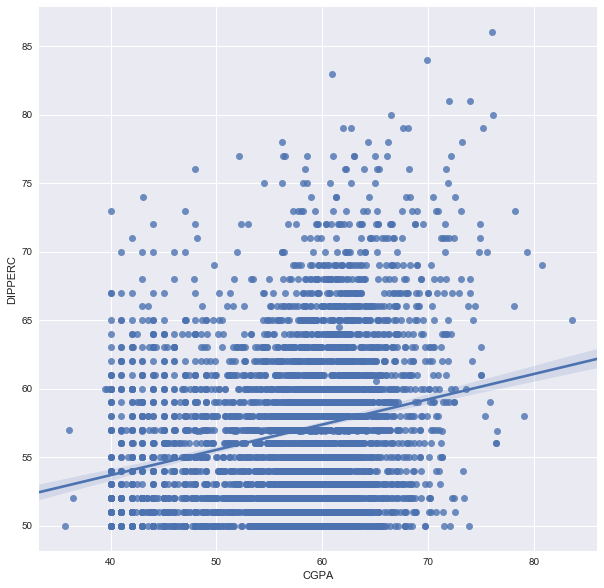

In [329]:
plt.figure(figsize=(10,10))
ax = sns.regplot(x="CGPA", y="DIPPERC", data=datasetFin,fit_reg=True)

Dans une premiere approche on remarque qu'il n'existe pas de correlation dans entre le diplome obtenus à l'exetat et la moyenned u poucentage final à l'université

Regardons de plus pret au sein de chaque faculté s'il peut y avoir une correlation.

In [334]:
Medecine=datasetFin.loc[datasetFin.FAC=='FM']

#### A. Faculté de Médecine

A.1 CGPA-POURCENTAGE

Cherchons les differentes correlations pouvan exsiter au sein de la faculté de medecine

In [448]:
CorreMatrix=Medecine.corr(method='pearson')

In [450]:
CorreMatrix.CGPA.sort_values(ascending=False)

CGPA         1.000000
DIPPERC      0.447654
NACADYEAR    0.158242
ID           0.096283
AGE         -0.256688
Name: CGPA, dtype: float64

In [337]:
pearsonr(Medecine.CGPA,Medecine.DIPPERC)

(0.44765396714867312, 2.5042090286791821e-13)

Au sein de la faculté de medécine nous remarquons que la correlation entre le pourcenatge à l'exetat et le CGPA est de 0.45  ce qui est pas mal

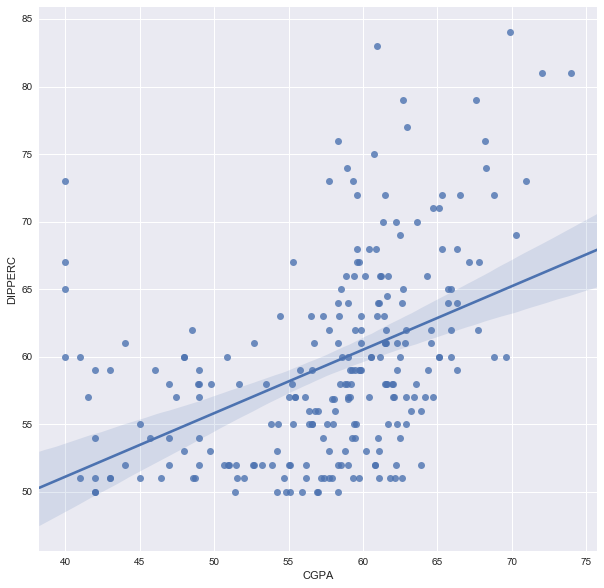

In [340]:
plt.figure(figsize=(10,10))
ax = sns.regplot(x="CGPA", y="DIPPERC", data=Medecine,fit_reg=True)

A.2 Age et CPGA

In [341]:
pearsonr(Medecine.CGPA,Medecine.AGE)

(-0.2566879460545976, 5.3370210238152509e-05)

In [ ]:
aucune relation entre l'age  et le diplome pourcenatge 

A.2 SchoolProvinece

In [343]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [344]:
datasetFin.columns

Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [348]:
moore_lm = ols('CGPA ~ C(SCHOOLSTATUS)',data=Medecine).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)

In [349]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLSTATUS),5.0,1560.231935,312.046387,7.273601,0.000002
Residual,236.0,10124.689350,42.901226,NaN,NaN


Il n'yas des correlation

In [347]:
Medecine.groupby('SCHOOLSTATUS').mean()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLSTATUS,,,,,
catholique,10867.909091,62.610830,20.704545,60.312500,1.545455
inconnu,9952.368421,55.052632,23.842105,55.044737,1.736842
musulman,11037.500000,56.000000,22.000000,56.900000,1.000000
privé,11150.379310,55.413793,21.758621,53.662069,1.344828
protestant,10991.243243,59.424007,21.391892,58.155405,1.418919
publique,11018.966667,57.033333,22.233333,54.351667,1.366667


Nous pouvons aisement remarqué que les étudiants venant des écoles catholiques reussisent mieux en faculté de medecine avec une moyennde de 60 ensuitent viennentceux des écoles protestatntes

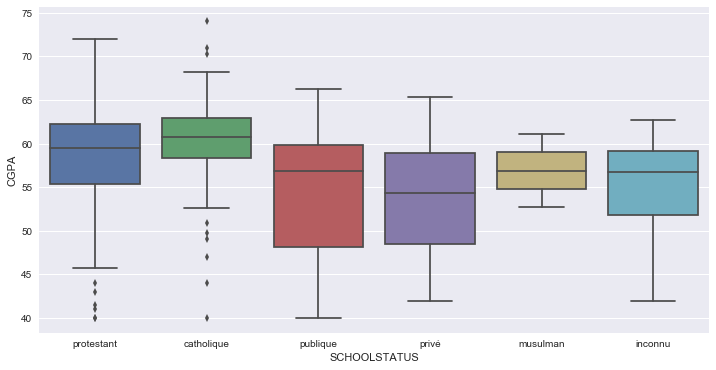

In [351]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="SCHOOLSTATUS", y="CGPA", data=Medecine)
plt.savefig('STATUS-CGPA.png',dpi=100)

A.4 Sexe :

In [ ]:
Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [350]:
moore_lm = ols('CGPA ~ C(GENDER)',data=Medecine).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(GENDER),1.0,117.513228,117.513228,2.438159,0.119733
Residual,240.0,11567.408056,48.197534,NaN,NaN


On conclus sans hesiter que la moyenne est la pour les filles que pour les garcons

,ID,DIPPERC,AGE,CGPA,NACADYEAR
GENDER,,,,,
F,11029.880734,60.066542,20.990826,58.444954,1.440367
H,10771.210526,58.916365,21.894737,57.044361,1.496241


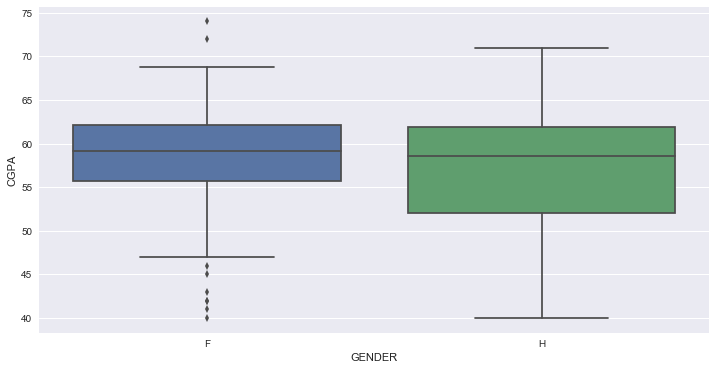

In [353]:
Medecine.groupby('GENDER').mean()
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="GENDER", y="CGPA", data=Medecine)
plt.savefig('GENDER-CGPA.png',dpi=100)

On Peut Remarquer que les filles on des meilleurs resulat que les garcons en Faculté de medecine surtout en terme des disticntions

A.6 GPA - SCHOOL

In [354]:
moore_lm = ols('CGPA ~ C(SCHOOL_RIGHT)',data=Medecine).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOL_RIGHT),93.0,5751.643494,61.845629,1.542681,0.009244
Residual,148.0,5933.277790,40.089715,NaN,NaN


Nous allons verifier comment se presente cette moyenne dans les 10 écoles les plus representée

In [359]:
SchoolGroup=Medecine.groupby('SCHOOL_RIGHT').mean()

In [368]:
SchoolGroup.columns

Index([u'ID', u'DIPPERC', u'AGE', u'CGPA', u'NACADYEAR'], dtype='object')

In [370]:
SchoolGroup.shape

(94, 5)

In [373]:
SchoolGroup.sort(axis=0,columns='CGPA',ascending=False,inplace=True)

In [374]:
SchoolGroup.reset_index(inplace=True)

In [427]:
SchoolGroup.loc[ range(0,6) + range(89,94)].SCHOOL_RIGHT

0              alfajiri
1       Institut NJANJA
2     idap isp rutshuru
3           mama mulezi
4                 bwito
5              bsangani
89          neema kwetu
90            de bukavu
91               masisi
92                 amen
93               hekima
Name: SCHOOL_RIGHT, dtype: object

In [432]:
Medecine.shape

(242, 14)

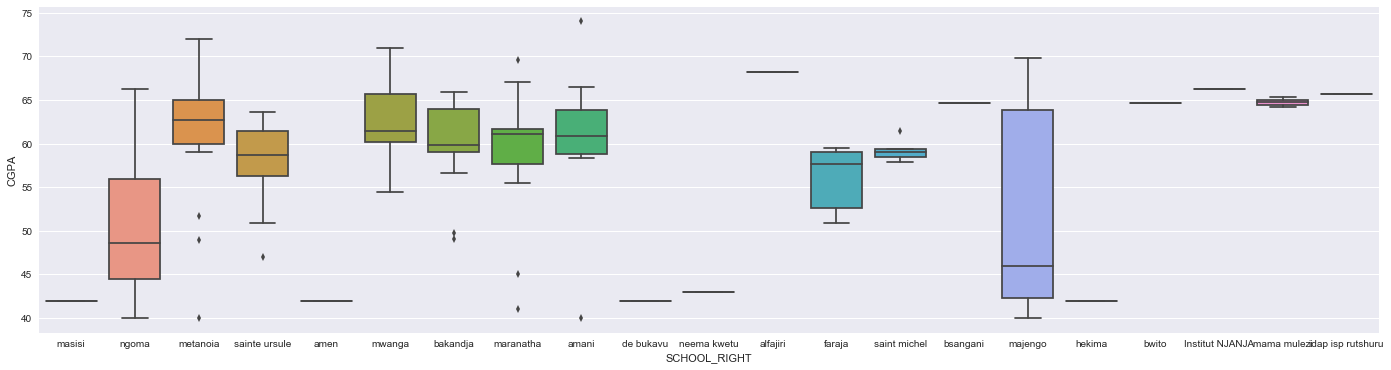

In [437]:
Medecine.groupby('SCHOOL_RIGHT').mean()
plt.figure(figsize=(24,6))
ax=sns.boxplot(x="SCHOOL_RIGHT", y="CGPA", data=Medecine.loc[operator.or_(Medecine.SCHOOL_RIGHT.isin(SchoolGroup.loc[ range(0,6) + range(89,94)].SCHOOL_RIGHT) 
             , Medecine.SCHOOL_RIGHT.isin(Medecine.SCHOOL_RIGHT.value_counts()[:10].index))])
plt.savefig('SCHOOL_RIGHT-CGPA.png',dpi=100)

Sur cette figure comment se repartissent le CGPA dans Les 20 ecoles dont 10 sont les plus representes et 5 sont ceux qui on une grande moyenne et 5 ceux qui ont une faible moyyenne
on remarque que les étudiant provenant des écoles comme lycée sainte ursule, mwanga, bakanja ,alfagiri, faraja,amani, n'echouent presque pas en faculté de medecine

In [436]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [438]:
OptionGroup=Medecine.groupby('OPTION_RIGHT').mean()

In [442]:
OptionGroup.sort(axis=0,columns='CGPA',ascending=False,inplace=True)

In [443]:
OptionGroup

,ID,DIPPERC,AGE,CGPA,NACADYEAR
OPTION_RIGHT,,,,,
secretariat,11686.000000,54.000000,20.000000,62.500000,1.000000
commerciale informatique,10982.750000,55.000000,21.500000,60.200001,1.500000
vétérinaire,10726.500000,57.469131,20.750000,59.000000,1.750000
bio-chimie,10827.522523,61.590090,21.000000,58.831532,1.531532
agronomie,11523.000000,65.000000,20.000000,58.500000,1.000000
nutr,11319.857143,60.634037,20.428571,58.375000,1.428571
commmerciale et adm,9272.600000,51.200000,25.400000,57.450000,1.600000
latin philo,10803.666667,58.166667,21.083333,57.329167,1.583333
pedagogie,11160.875000,58.664094,22.416667,56.628125,1.312500


In [444]:
pearsonr(OptionGroup.DIPPERC,OptionGroup.CGPA)

(0.024778204523123036, 0.93596027075298815)

Dans cette table nous pouvons voir la réparttion des moyennes des poucentage selon les option!
voyons en image à quoi ça ressemble

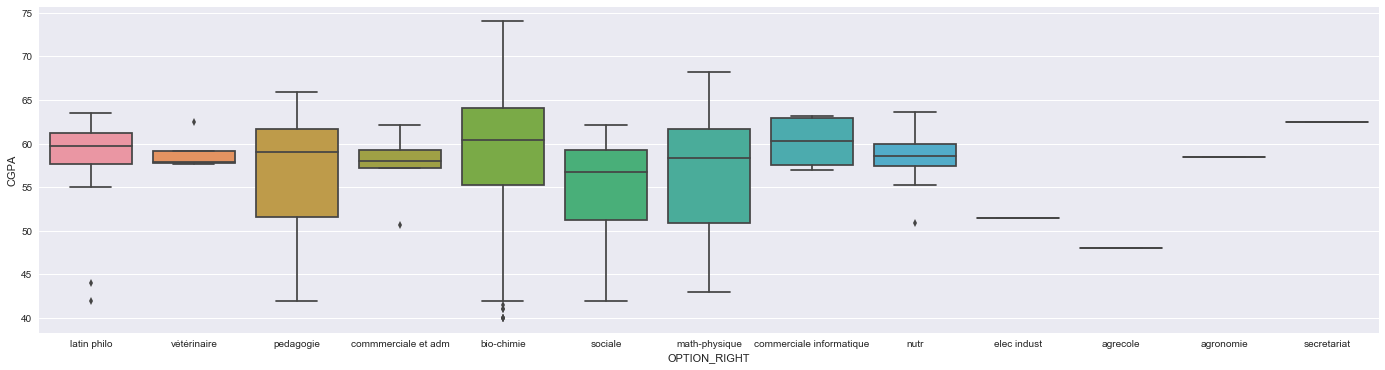

In [441]:
plt.figure(figsize=(24,6))
ax=sns.boxplot(x="OPTION_RIGHT", y="CGPA", data=Medecine)
plt.savefig('OPTION_RIGHT-CGPA.png',dpi=100)

Sur la table on remarque que l'option n'a aucune influance sur notre variable CGPA mais notons que la moyenne la plus élevé vient de l'option sécretariat

In [451]:
moore_lm = ols('CGPA ~ C(OPTION_RIGHT)',data=Medecine).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(OPTION_RIGHT),12.0,608.756098,50.729675,1.048837,0.405075
Residual,229.0,11076.165186,48.367534,NaN,NaN


##### Faculté de TechNologies

In [501]:
Techno=datasetFin.loc[datasetFin.FAC=='FSTA']

Commencons par les attribues numeriques et analysons la correlation chercher comme sur le point précedant la correlation avec le CGPA

#### B.1 Attribue Age, Diplome Percentage Vs CGPA

In [461]:
Techno.corr()['CGPA'].sort_values()

ID          -0.239869
AGE         -0.032067
DIPPERC      0.346685
NACADYEAR    0.463141
CGPA         1.000000
Name: CGPA, dtype: float64

- Diplome PErcentage : Le coefiicient de correlation de pearson est de 0.34 donc il n'yas pas un lien considerable entre le pourcentage du diplome d'etat et le CGPA
- Meme conclusion Pour l'age

#### B.2 Gender 

In [462]:
moore_lm = ols('CGPA ~ C(GENDER)',data=Techno).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(GENDER),1.0,232.763899,232.763899,3.04747,0.081204
Residual,901.0,68817.820379,76.379379,NaN,NaN


Notre metrique nous montre que la moyenne de CGPA est la meme pour les deux sexes ! jettons un coup d'oeil  aux distribution avec des box-plot.

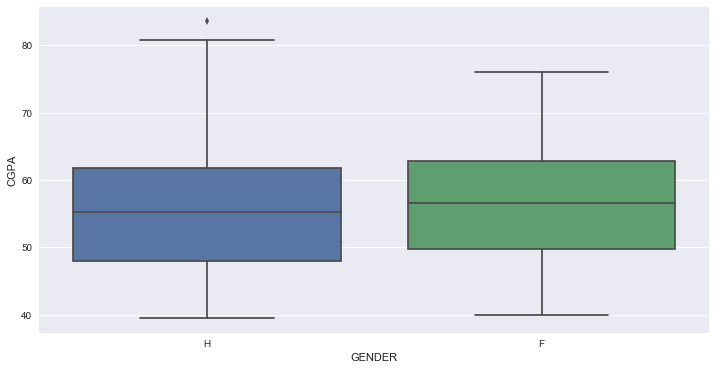

In [463]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="GENDER", y="CGPA", data=Techno)
plt.savefig('GENDER-CGPA-Tech.png',dpi=100)

In [465]:
Techno.GENDER.value_counts()/len(Techno)

H    0.844961
F    0.155039
Name: GENDER, dtype: float64

Nous remarquons que les 2 graphiques sont les memes , memes il ya un desequilibre car la facultée est constitué par 85% des hommes et 15% des femmes 

In [466]:
Techno.groupby('GENDER').mean()

,ID,DIPPERC,AGE,CGPA,NACADYEAR
GENDER,,,,,
F,9361.742857,60.905379,22.271429,56.604940,2.035714
H,9130.601573,58.581266,23.498034,55.202206,1.858453


Mais on peut remarquer ques les femmes reussient bien legerement que les homme!

#### B.4 Attribue Province

In [467]:
Techno.columns

Index([u'ID', u'SCHOOLSTATUS', u'SCHOOL_RIGHT', u'OPTION_RIGHT', u'FAC',
       u'SCHOOLPROVINCE', u'GENDER', u'DIPPERC', u'AGE', u'CGPA',
       u'DistinctionRatio', u'EchecRatio', u'NACADYEAR',
       u'Pass1stSessionRatio'],
      dtype='object')

In [476]:
moore_lm = ols('CGPA ~ C(SCHOOLPROVINCE)',data=Techno).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLPROVINCE),11.0,1388.355204,126.214109,1.662032,0.07731
Residual,891.0,67662.229073,75.939651,NaN,NaN


PR =0.078 est superieur à 0.05 nous pouvons conclure que la moyenne est la meme sur toutes les facultés

In [472]:
Techno.groupby('SCHOOLPROVINCE').mean().sort(axis=0,columns='CGPA',ascending=False)

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLPROVINCE,,,,,
KASAI ORIENTAL,9162.000000,66.000000,22.000000,61.599998,3.000000
inconnu,6095.800000,56.950609,26.200000,58.213333,2.600000
SUD-KIVU,8610.916667,58.295153,23.800926,56.657716,2.064815
KASAI OCCIDENTAL,7537.000000,56.000000,24.000000,55.433333,3.000000
NORD-KIVU,9360.864697,59.220456,22.958009,55.199728,1.828927
ORIENTALE,9563.125000,59.437500,24.437500,54.013541,1.875000
KINSHASA,8379.400000,59.400000,30.800000,52.480000,2.000000
KATANGA,10921.166667,56.666667,23.166667,50.861111,1.333333
K OR,7683.000000,55.000000,33.000000,49.100000,2.000000


Nous remarquons que la moyenne de GPA est superieur Pour la province Kasai oriental , ensuite vienne la province du sud-Kivu , le kasai occiental et la province du Nord Kivu

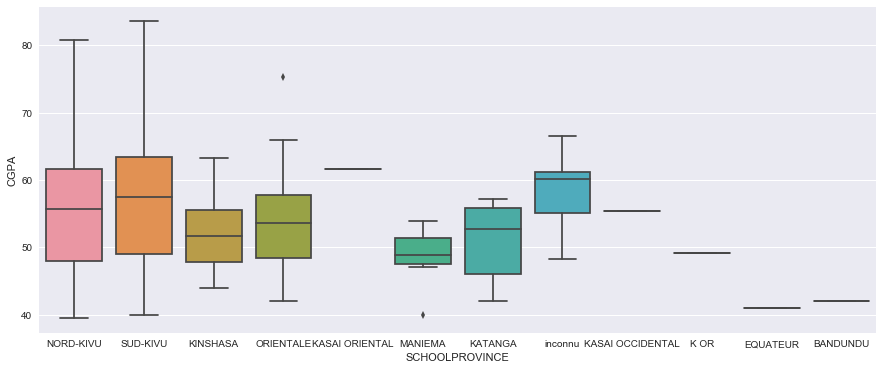

In [474]:
plt.figure(figsize=(15,6))
ax=sns.boxplot(x="SCHOOLPROVINCE", y="CGPA", data=Techno)
plt.savefig('GENDER-SCHOOLPROVINCE-Tech.png',dpi=100)

Sur le graphique on conclu Rapidement que les étudiant provenant de la province du sud Kivu sont plus performant en faulté de Technologie

#### B.5 Stattus de L'école 

In [477]:
moore_lm = ols('CGPA ~ C(SCHOOLSTATUS)',data=Techno).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOLSTATUS),7.0,5417.817584,773.973941,10.886006,3.123579e-13
Residual,895.0,63632.766694,71.098063,NaN,NaN


Il n'ya aucun lien entre les moyennes de CGPA pour les differents status de l"ecole

In [478]:
Techno.groupby('SCHOOLSTATUS').mean().sort(axis=0,columns='CGPA',ascending=False)

,ID,DIPPERC,AGE,CGPA,NACADYEAR
SCHOOLSTATUS,,,,,
catholique,8943.467422,61.121813,23.116147,58.326393,2.011331
autodidacte,9656.222222,59.888889,24.888889,54.787963,2.000000
protestant,9337.902326,58.241286,22.995349,54.296008,1.739535
inconnu,8644.352000,56.811061,24.800000,53.958533,2.120000
publique,9611.635659,57.348837,22.976744,52.992959,1.728682
privé,9754.985714,56.742857,22.985714,51.556667,1.571429
musulman,10336.000000,61.000000,23.000000,51.150000,2.000000
kimbanguiste,12064.000000,55.000000,23.000000,47.000000,1.000000


Nous remarquons que les éetudiant venant des écoles catholiques reussiseent mieux en faculté de techno , ensuite les autodidacte ,ensuite ceux des ecoles protestatntes

Voyons cela de plus pret avec box-plot

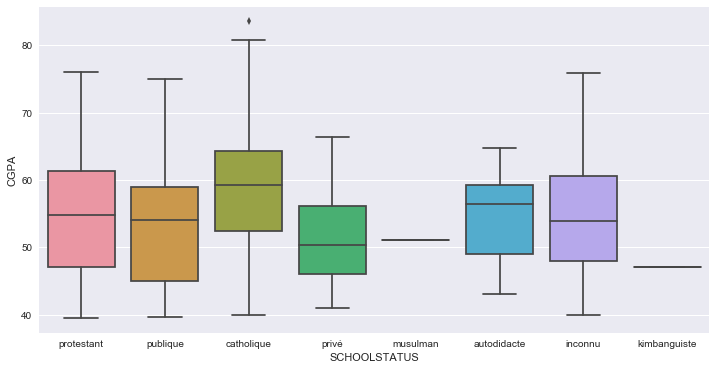

In [479]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="SCHOOLSTATUS", y="CGPA", data=Techno)
plt.savefig('GENDER-SCHOOLSTATUS-Tech.png',dpi=100)

#### B.Les Ecoles de provenances

In [480]:
moore_lm = ols('CGPA ~ C(SCHOOL_RIGHT)',data=Techno).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(SCHOOL_RIGHT),215.0,26367.460860,122.639353,1.973924,3.939156e-11
Residual,687.0,42683.123418,62.129728,NaN,NaN


Aucunne correlation n'existe entre l"ecole et le CGPA au vu de la valeur de PR'

In [504]:
SchoolGroup=Techno.groupby('SCHOOL_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False)

In [505]:
SchoolGroup.reset_index(inplace=True)

In [506]:
SchoolGroup

,SCHOOL_RIGHT,ID,DIPPERC,AGE,CGPA,NACADYEAR
0,nikisi,4249.000000,58.000000,26.000000,75.349998,2.000000
1,technique ind. de mahamba,12228.000000,62.000000,24.000000,71.900002,1.000000
2,INST DE KATWA,3992.000000,67.000000,27.000000,68.900002,2.000000
3,mululusake,11662.000000,73.000000,19.000000,68.500000,1.000000
4,cirezi,8139.500000,58.750000,22.000000,65.970834,3.250000
5,vungi,8077.666667,55.000000,23.666667,64.772222,2.666667
6,itfm/bukavu,7963.804878,58.777476,23.902439,64.395529,2.048780
7,saint michel,10016.000000,60.000000,23.000000,64.049999,2.000000
8,katana,9144.000000,57.000000,22.000000,63.466667,3.000000
9,it bugabo,10308.000000,50.000000,22.000000,62.799999,2.000000


Nous allons Voir de plus pret pour les 10 ecoles les plus representé, le 5 éecoles avec un pourcentage elevé et 5 dernier

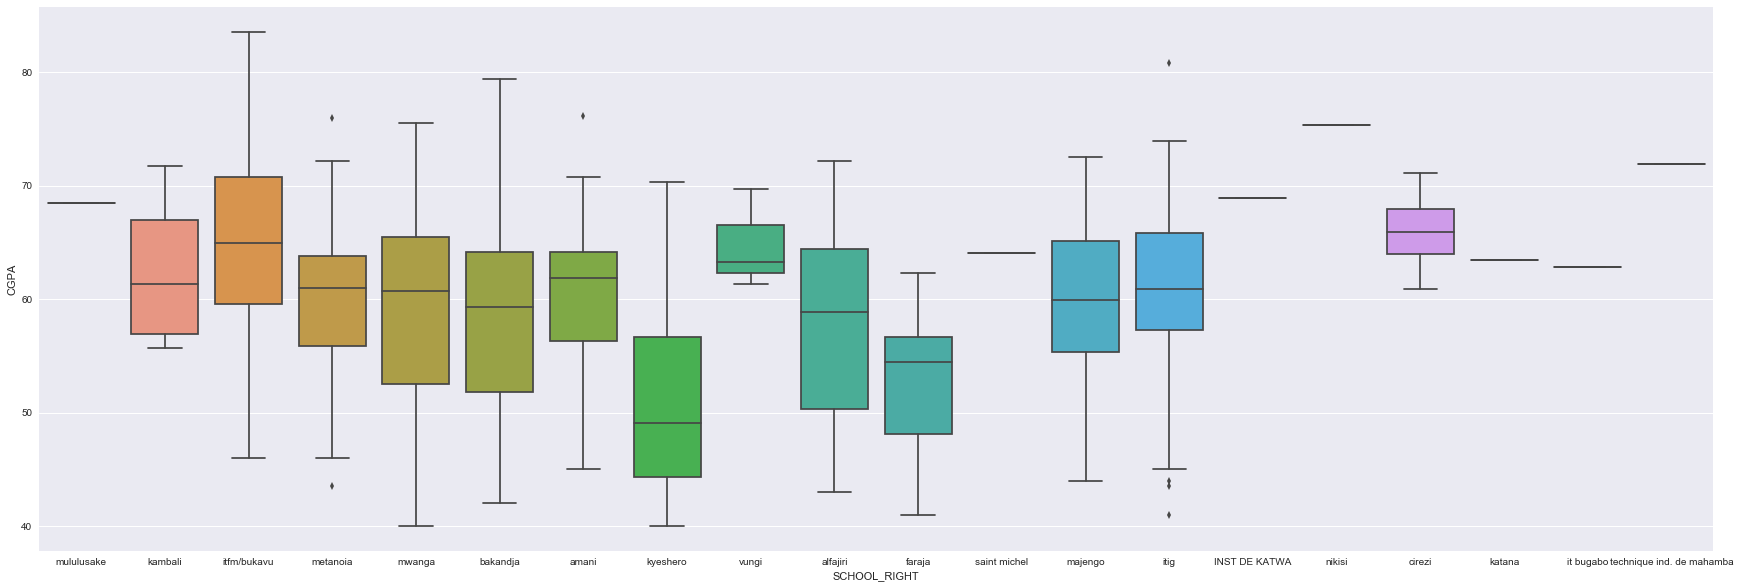

In [519]:
plt.figure(figsize=(30,10))
ax=sns.boxplot(x="SCHOOL_RIGHT", y="CGPA", data=Techno.loc[operator.or_(Techno.SCHOOL_RIGHT.isin(SchoolGroup.loc[ range(0,11)].SCHOOL_RIGHT) 
             , Techno.SCHOOL_RIGHT.isin(Techno.SCHOOL_RIGHT.value_counts()[:10].index ))])
plt.savefig('SCHOOL_RIGHT-CGPA.png',dpi=100)

On remarques sur la figure que les grandes écoles connus on une bonne moyenne et un bon maximun de CGPA comme le lycée Amani, l'ITIG , l'ITFM!

#### B.7 OPTION DU DIPLOME 

In [521]:
len(Techno.OPTION_RIGHT.value_counts())

23

Nous pouvons constater que nous avons 23 options differents Voyons comment evoluer la moyenne

In [522]:
moore_lm = ols('CGPA ~ C(OPTION_RIGHT)',data=Techno).fit()
aov_table = sm.stats.anova_lm(moore_lm, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(OPTION_RIGHT),22.0,11622.024556,528.273843,8.094944,1.055221e-23
Residual,880.0,57428.559721,65.259727,NaN,NaN


La valeur est inferieur à 0.05 donc il n'yas pas de relation entre les valeurs 

In [527]:
GroupOption=Techno.groupby('OPTION_RIGHT').mean().sort(axis=0,columns='CGPA',ascending=False).reset_index()

Voila comme on pourait s'y attendre les options techniques et Scientifiques viennent en tete de liste et en bas de l'echel vient les ption littereraires et commerciales

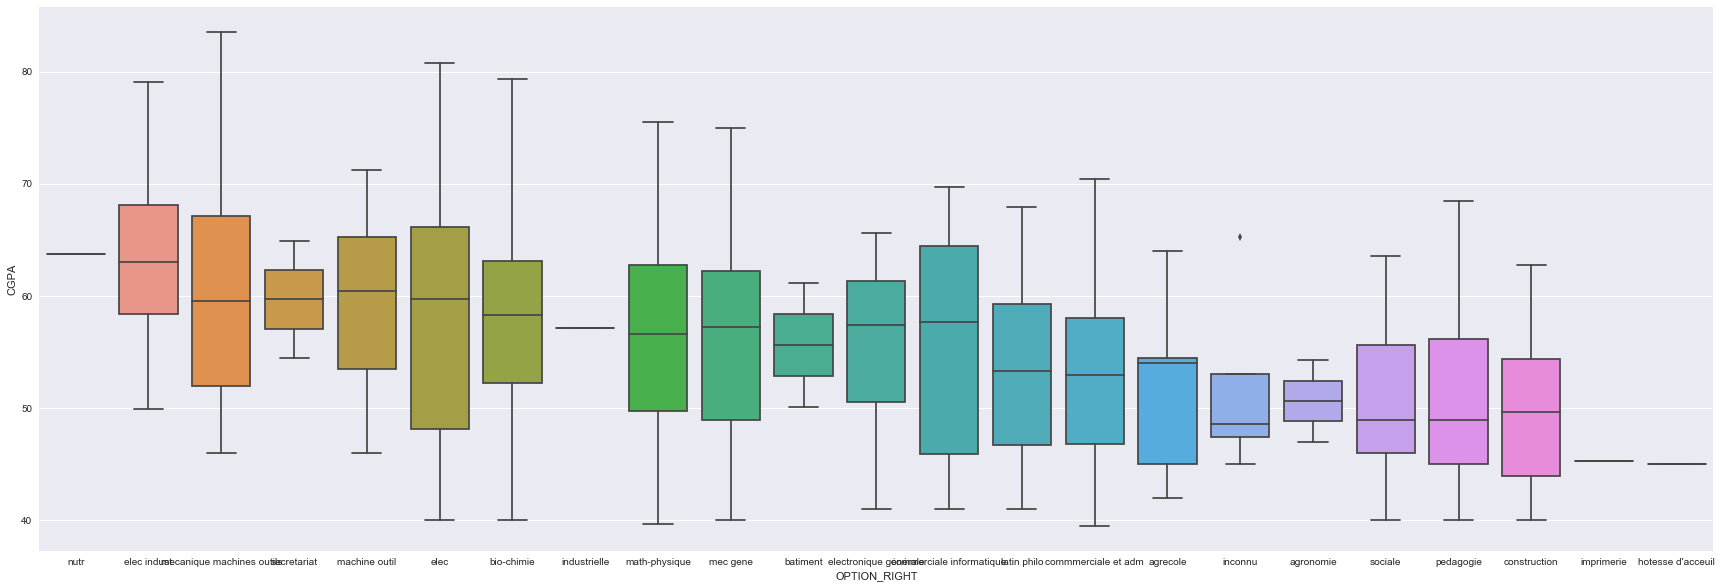

In [529]:
plt.figure(figsize=(30,10))
ax=sns.boxplot(x="OPTION_RIGHT", y="CGPA", data=Techno,order=GroupOption.OPTION_RIGHT)
plt.savefig('OPTION_RIGHT-CGPA.png',dpi=100)

In [ ]:
cela peut se remarquer aisement sur la figures que les sections techniques sont ceux dont le étudiants reussisnet le mieu